In [8]:
from ctapipe.coordinates import TelescopeFrame
from astropy.coordinates import AltAz, SkyCoord, EarthLocation
from astropy.time import Time
import astropy.units as u
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
import matplotlib.pyplot as plt
import numpy as np

In [22]:
%matplotlib inline

In [29]:
t = Time('2020-01-01T00:00:00')
orm = EarthLocation.of_site('Roque de los Muchachos')
p = SkyCoord(alt=90 * u.deg, az=0*u.deg, frame=AltAz(location=orm, obstime=t))

In [20]:
from astropy.utils.iers import conf
conf.auto_max_age = None

(-5, 5)

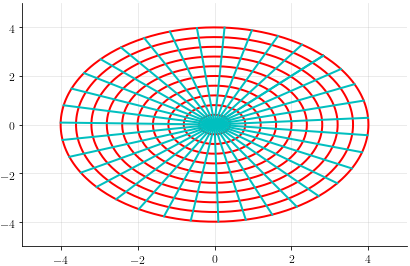

In [34]:
tel_frame = TelescopeFrame(telescope_pointing=p, obstime=t, location=orm)

az = np.linspace(-180, 180, 360) * u.deg
for alt in np.linspace(p.alt.deg - 4, min(p.alt.deg + 4, 90), 11) * u.deg:
    coords = SkyCoord(az=az, alt=alt, frame=pointing.frame)
    tel_coords = coords.transform_to(tel_frame)
    
    plt.plot(tel_coords.delta_az.deg, tel_coords.delta_alt.deg, 'r-')

alt = np.linspace(p.alt.deg - 4, min(p.alt.deg + 4, 90), 50) * u.deg
for az in np.linspace(-180, 180, 36) * u.deg:
    coords = SkyCoord(az=az, alt=alt, frame=pointing.frame)
    tel_coords = coords.transform_to(tel_frame)
    
    plt.plot(tel_coords.delta_az.deg, tel_coords.delta_alt.deg, 'c-')
    
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [11]:
TelescopeFrame?

Init signature: TelescopeFrame(*args, **kwargs)
Docstring:     
Telescope coordinate frame.

A Frame using a UnitSphericalRepresentation.
This is basically the same as a HorizonCoordinate, but the
origin is at the telescope's pointing direction.
This is what astropy calls a SkyOffsetCoordinate

Attributes
----------

telescope_pointing: SkyCoord[AltAz]
    Coordinate of the telescope pointing in AltAz
obstime: Tiem
    Observation time
location: EarthLocation
    Location of the telescope
File:           /net/big-tank/POOL/users/lnickel/thesis/analysis/software/ctapipe/ctapipe/coordinates/telescope_frame.py
Type:           FrameMeta
Subclasses:     
